# Anomalías

A diferencia de muchas cosas que hemos visto hasta ahora, como tal en Python no hay una función que calcule anomalías, porque eso va a depender de nosotros (porque es básicamente una resta y ya) pero veamos cómo podemos hacer diferentes aproximaciones a las anomalías


In [ ]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._

# Cargar los datos
fifa = pd.read_csv('fifa_data.csv')
#._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._

# Seleccionar los datos
overall = fifa[['Club', 'Overall']]

Aquí es donde viene lo bueno, suponiendo que sólo tienen esas dos columnas, cómo podríamos analizar anomalías? Realmente hay muchas maneras.
Veamos quizás la más intuitiva, comparar promedios.

In [ ]:
# Obtener promedio del overall
prom_ov = np.mean(overall['Overall']).round(2) # Este es el promedio de todos los jugadores

# Obtengan el promedio del club Leicester City

In [ ]:
# Entonces cómo sería la anomalía?

anom = team1 - prom_ov # Qué indica esto? Y cómo se podría plotear?

anom

In [ ]:
x = np.arange(1)
# Graficar
fig, ax = plt.subplots()
plt.scatter(x = x, y = prom_ov, color = '#88c999')
plt.scatter(x = x, y = team1, color = 'red')
plt.plot([0, 0], [prom_ov, team1], color = 'blue', linestyle = ':', zorder = 0)

Realmente no dice mucho, como estos datos están tomados en un momento en particular entonces no podemos ver si hay alguna evolución en el tiempo. No obstante sí que podemos hacer otras cosas.

Supongamos que queremos comparar no el promedio, si no los valores particulares de cada jugador comparado con el promedio global.

In [ ]:
# Cargar los datos
fifa = pd.read_csv('fifa_data.csv')
#._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._._

# Seleccionar los datos
overall = fifa[['Club', 'Overall']]

# Obtener promedio del overall
prom_ov = np.mean(overall['Overall']).round(2) # Este es el promedio de todos los jugadores

# Ahora obtengamos un club en particular
sevilla = overall[overall['Club'] == 'Sevilla FC']

# Ahora obtengamos la anomalía pero de cada jugador
anom_team = sevilla['Overall'] - prom_ov

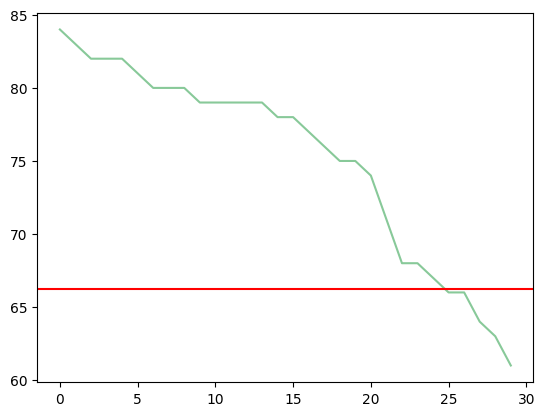

In [ ]:
# Bueno ya tienen algo hecho ahora viene lo bueno, plotear

x = np.arange(len(anom_team))
# Graficar
fig, ax = plt.subplots()
#plt.plot(x, anom_team, color = '#88c999')
plt.plot(x, sevilla['Overall'], color = '#88c999')
plt.axhline(y = prom_ov, color='r', linestyle='-')

In [ ]:
# O quizás algo así?

fifa2 = fifa[['Club', 'Overall', 'Name']]
sevilla = fifa2[fifa2['Club'] == 'Sevilla FC']


jugadores = sevilla['Name']
cantidad = np.array(len(jugadores))

fig, ax = plt.subplots()
plt.bar(jugadores, anom_team, color = ['blue'], width = 0.7);
plt.title('Compartamiento de jugadores del Sevilla vs el promedio ');
plt.ylabel('Anomalía');
plt.xticks(rotation = 90);
#

Recuerden que lo importante es la interpretación ¿Qué significa cada barra? y ¿Qué podemos saber de cada jugador a partir de ella?

In [ ]:
# Ahora, no es mal gráfico pero ya es momento que hagan gráficos cada vez más interesantes
# Supongamos que son entrenadores y quieren resaltar a los jugadores que estén  10 puntos
# por arriba de la media así como los que están por debajo de la media


Ahora, lo interesante de las anomalías es que pueden detectar extremos de diferentes maneras. Por ejemplo, en vez de presentar el valor absoluto podrían utilizar porcentajes, de esta manera puede ser más intuitivo ver las diferencias que hay con respecto a la media.

In [ ]:
# Básicamente una anomalía porcentual en vez de considerar el 0 como línea base,
# Considera que el 100% es el 0, entonces las anomalías se van a
# moverse alrededor de ese valor.

# Entonces haríamos una regla de 3

percent = (anom_team * 100) / prom_ov



Bueno, es su turno :)

Ahora que son expertos, hagan el siguiente ejercicio:
